<a href="https://colab.research.google.com/github/dustyattenborough/lectures-bigphys/blob/master/spring_wonsang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

빅데이터 물리학 첫번째 예제

이 노트북은 빅데이터 물리학 예제입니다. 파이선기초를 하겠습니다.

In [ ]:
#빅데이터 물리학 첫번쨰 예제


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from google.colab import files
import os
import torch
#from math import *

과제:깃헙에 올리고 풀리퀘스트 하기
여러개 하모닉 오실레이터 하기

In [ ]:
print(1,2,3, sep = " : ",end="  endofline")

1 : 2 : 3  endofline

In [ ]:
if __name__=='__main__':
  print("this is main")

this is main


Text(0.5, 1.0, 'sho')

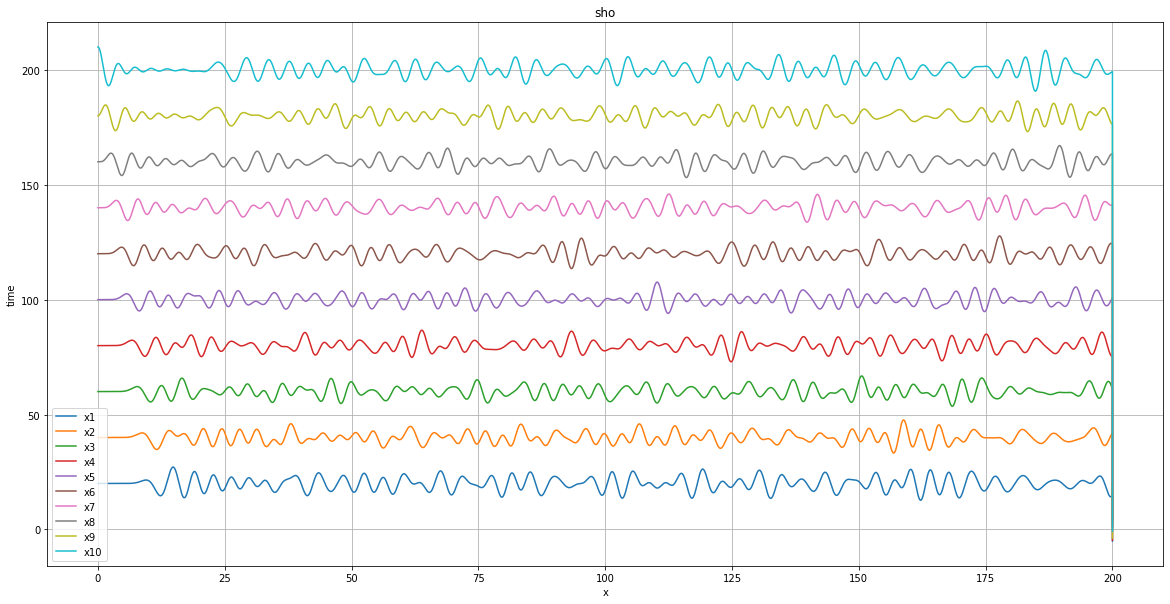

In [71]:
# 좌우 파동  ]~o~o~o~...~o~[
n=10
k_l=[1,1,1,1,1,1,1,1,1,1,1] #i th spring

m_l=[1,1,1,1,1,1,1,1,1,1] # i th mass

x0_l=[0,0,0,0,0,0,0,0,0,10] # i th dx
a0_l=[0,0,0,0,0,0,0,0,0,0]
v0_l=[0,0,0,0,0,0,0,0,0,0]

set_l=[20,40,60,80,100,120,140,160,180,200] # i 번째 의 기본 위치

x_l=[[0]]
v_l=[[0]]
a_l=[[0]]
vhf_l=[]

for q in range(n):
  x_l.append([x0_l[q]])
  v_l.append([v0_l[q]])
  a_l.append([a0_l[q]])
  vhf_l.append([])

x_l.append([0])
v_l.append([0])
a_l.append([0])

time0=[0]

dt=0.001



for i in range(200000):
  for ii in range(n):
    a_l[ii+1].append((-1*k_l[ii]*(x_l[ii+1][i]-x_l[ii][i]))*(1/m_l[ii])+(k_l[ii+1]*(x_l[ii+2][i]-x_l[ii+1][i])/m_l[ii]))
  for jj in range(n):
    vhf_l[jj].append(v_l[jj+1][i]+a_l[jj+1][i]*(dt/2))
  for kk in range(n):
    x_l[kk+1].append(x_l[kk+1][i]+vhf_l[kk][i]*dt)
  for ll in range(n):
    v_l[ll+1].append(vhf_l[ll][i]+a_l[ll+1][i+1]*(dt/2))
  x_l[0].append(0)
  x_l[n+1].append(0)
  v_l[0].append(0)
  v_l[n+1].append(0)
  a_l[0].append(0)
  a_l[n+1].append(0)
  time0.append(time0[i]+dt)

for j in range(200000):
  for k in range(n):
    x_l[k+1][j]+=set_l[k]


figure=plt.figure(figsize=(20,10))
for it in range(n):
  aa='x'+str(it+1)
  plt.plot(time0,x_l[it+1],label=aa)
plt.xlabel('x')
plt.ylabel('time')
plt.legend()
plt.grid(True)

plt.title("sho")

In [17]:

aa='nana'+str(20)
print(aa)

nana20


Text(0.5, 1.0, 'sho')

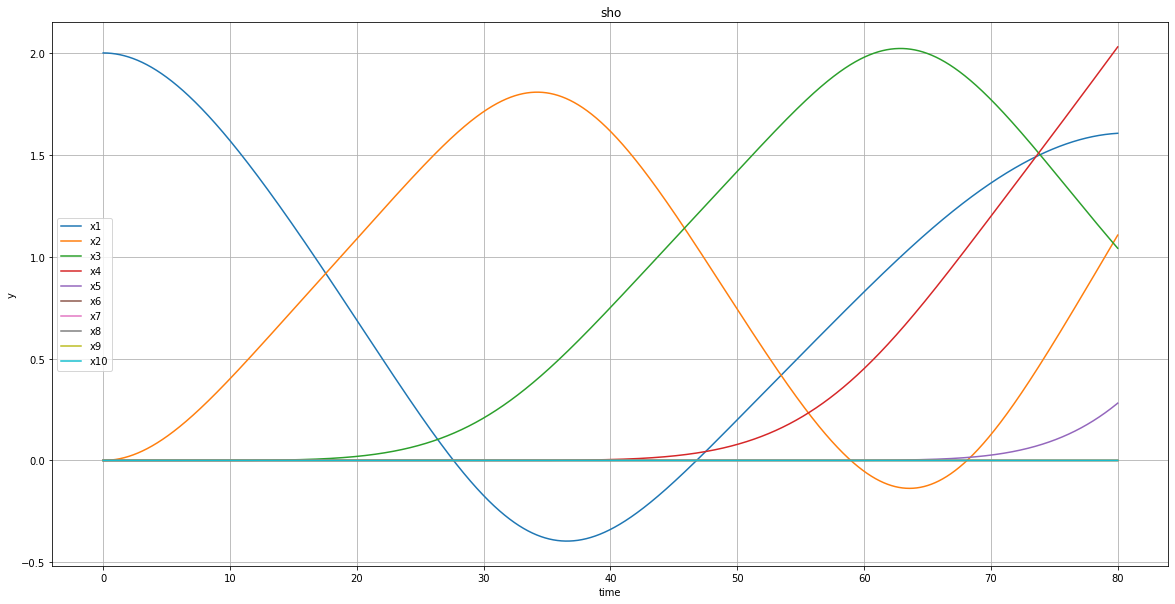

In [70]:
# 상하 파동 ]~o~o~o~...~o~[
n=10
k_l=[1,1,1,1,1,1,1,1,1,1,1] #i th spring

m_l=[1,1,1,1,1,1,1,1,1,1] # i th mass

x0_l=[0,0,0,0,0,0,0,0,0,0] # i th dx
ax0_l=[0,0,0,0,0,0,0,0,0,0]
vx0_l=[0,0,0,0,0,0,0,0,0,0]

y0_l=[2,0,0,0,0,0,0,0,0,0] # i th dx
ay0_l=[0,0,0,0,0,0,0,0,0,0]
vy0_l=[0,0,0,0,0,0,0,0,0,0]


dl=20
set_l=[]
for i1 in range(n):
  set_l.append(dl*(i1+1))
#set_l=[20,40,60,80,100,120,140,160,180,200] # i 번째 의 기본 위치

x_l=[[0]]
vx_l=[[0]]
ax_l=[[0]]
vhfx_l=[]

y_l=[[0]]
vy_l=[[0]]
ay_l=[[0]]
vhfy_l=[]

Lb=[]
Lf=[]
cosb=[]
cosf=[]
sinb=[]
sinf=[]

for q in range(n):
  x_l.append([x0_l[q]])
  vx_l.append([vx0_l[q]])
  ax_l.append([ax0_l[q]])
  vhfx_l.append([])
  y_l.append([y0_l[q]])
  vy_l.append([vy0_l[q]])
  ay_l.append([ay0_l[q]])
  vhfy_l.append([])
  Lb.append([])
  Lf.append([])
  cosb.append([])
  cosf.append([])
  sinb.append([])
  sinf.append([])

x_l.append([0])
vx_l.append([0])
ax_l.append([0])

y_l.append([0])
vy_l.append([0])
ay_l.append([0])


time0=[0]

dt=0.0001


tau=800000

for i in range(tau):

  for ii in range(n):
    Lb[ii].append(math.sqrt((x_l[ii+1][i]-x_l[ii][i]+dl)**2 + (y_l[ii+1][i]-y_l[ii][i])**2))
    Lf[ii].append(math.sqrt((x_l[ii+2][i]-x_l[ii+1][i]+dl)**2 + (y_l[ii+2][i]-y_l[ii+1][i]) **2))
    sinb[ii].append((y_l[ii+1][i]-y_l[ii][i])/Lb[ii][i])
    sinf[ii].append((y_l[ii+2][i]-x_l[ii+1][i])/Lf[ii][i])
    cosb[ii].append((x_l[ii+1][i]-x_l[ii][i]+dl)/Lb[ii][i])
    cosf[ii].append((x_l[ii+2][i]-x_l[ii+1][i]+dl)/Lf[ii][i])
    ax_l[ii+1].append((-1*k_l[ii]*(abs(Lb[ii][i]-dl)*cosb[ii][i])*(1/m_l[ii]))+(k_l[ii+1]*(abs(Lf[ii][i]-dl)*cosf[ii][i])/m_l[ii]))
    ay_l[ii+1].append((-1*k_l[ii]*(abs(Lb[ii][i]-dl)*sinb[ii][i])*(1/m_l[ii]))+(k_l[ii+1]*(abs(Lf[ii][i]-dl)*sinf[ii][i])/m_l[ii]))
  for jj in range(n):
    vhfx_l[jj].append(vx_l[jj+1][i]+ax_l[jj+1][i]*(dt/2))
    vhfy_l[jj].append(vy_l[jj+1][i]+ay_l[jj+1][i]*(dt/2))
  for kk in range(n):
    #x_l[kk+1].append(x_l[kk+1][i]+vhfx_l[kk][i]*dt)
    x_l[kk+1].append(x_l[kk+1][i]) #-> x는 고정
    y_l[kk+1].append(y_l[kk+1][i]+vhfy_l[kk][i]*dt)
  for ll in range(n):
    vx_l[ll+1].append(vhfx_l[ll][i]+ax_l[ll+1][i+1]*(dt/2))
    vy_l[ll+1].append(vhfy_l[ll][i]+ay_l[ll+1][i+1]*(dt/2))

  x_l[0].append(0)
  x_l[n+1].append(0)
  vx_l[0].append(0)
  vx_l[n+1].append(0)
  ax_l[0].append(0)
  ax_l[n+1].append(0)

  y_l[0].append(0)
  y_l[n+1].append(0)
  vy_l[0].append(0)
  vy_l[n+1].append(0)
  ay_l[0].append(0)
  ay_l[n+1].append(0)
  
  time0.append(time0[i]+dt)

for j in range(tau):
  for k in range(n):
    x_l[k+1][j]+=set_l[k]


figure=plt.figure(figsize=(20,10))
for it in range(n):
  aa='x'+str(it+1)
  plt.plot(time0,y_l[it+1],label=aa)
plt.xlabel('time')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.title("sho")